In [107]:
#Pandas is used for data manipulation
import pandas as pd

In [108]:
#Read in data and display first 5rows
features=pd.read_csv('data2.csv')
features.head(5)

,O,C,E,A,N,BBB
0,3.0,1.0,4.0,2,5.0,4.0
1,4.0,2.0,1.0,5,3.0,1.0
2,1.0,3.0,5.0,2,4.0,5.0
3,1.0,2.0,4.5,3,4.5,4.5
4,2.0,1.0,4.0,3,5.0,6.0


In [109]:
print('The shape of our features is: ', features.shape)

The shape of our features is:  (33, 6)


In [110]:
#Descriptive statistics for each column
features.describe()

,O,C,E,A,N,BBB
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2.878788,2.166667,2.454545,3.515152,3.984848,5.348485
std,1.510537,1.203294,1.270849,1.148945,1.107396,1.817815
min,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000
25%,1.000000,1.000000,1.000000,3.000000,3.500000,4.000000
50%,3.000000,2.000000,2.000000,4.000000,4.000000,5.500000
75%,4.000000,3.000000,3.000000,4.000000,5.000000,6.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000


In [111]:
#Use numpy to convert to arrays
import numpy as np

In [112]:
#Labels are the values we want to predict
labels=np.array(features['BBB'])

In [113]:
#Remove the labels from the features
#axis 1 refers to the columns
features= features.drop('BBB', axis=1)
features.head(5)

,O,C,E,A,N
0,3.0,1.0,4.0,2,5.0
1,4.0,2.0,1.0,5,3.0
2,1.0,3.0,5.0,2,4.0
3,1.0,2.0,4.5,3,4.5
4,2.0,1.0,4.0,3,5.0


In [114]:
#Saving feature names for later use
feature_list=list(features.columns)

#Convert to numpy array
features=np.array(features)

In [115]:
#Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels= train_test_split(features, labels, test_size=0.25, random_state=42)

In [116]:
print('Training Features Shape: ', train_features.shape)
print('Training Labels Shape: ', train_labels.shape)
print('Testing Features Shape: ', test_features.shape)
print('Testing Labels Shape: ', test_labels.shape)

Training Features Shape:  (24, 5)
Training Labels Shape:  (24,)
Testing Features Shape:  (9, 5)
Testing Labels Shape:  (9,)


In [117]:
#Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 50 decision trees
rf=RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on training data
rf.fit(train_features, train_labels);

In [118]:
#Use the forest's predict method on the test
predictions = rf.predict(test_features)

#Calculate the absoulte errors
errors=abs(predictions - test_labels)

#Print out the mean absolute error(mae)
print('Mean Absolute Errors: ', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Errors:  1.65 degrees.


In [119]:
#Calculate mean absolute percentage error (MAPE)
mape= 100*(errors/test_labels)

#Calculate and display accuracy
accuracy=100 - np.mean(mape)
print('Accuracy: ', round(accuracy,2), '%.')
#print(rf.feature_importances_)

Accuracy:  68.49 %.


In [120]:
#Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
#Pull out one tree from the forest
tree=rf.estimators_[5]

In [121]:
#Export the image to a dot file 
export_graphviz(tree, out_file='tree2.dot', feature_names=feature_list, rounded=True, precision=1)

In [122]:
#Use dot file to create a graph
(graph, )=pydot.graph_from_dot_file('tree2.dot')

In [123]:
#Write graph to a png file
#graph.write_png('tree2.png')

In [124]:
#Variable Importances

#Get numerical feature importances
importances=list(rf.feature_importances_)

#List of tuples with variable and importance
feature_importances=[(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse = True)

#Print out the feature and importances
[print('Valiable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Valiable: N                    Importance: 0.28
Valiable: E                    Importance: 0.27
Valiable: A                    Importance: 0.16
Valiable: O                    Importance: 0.14
Valiable: C                    Importance: 0.14


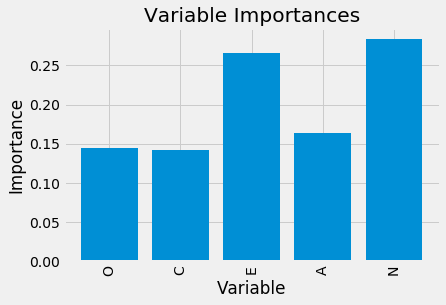

In [125]:
#Visualization

#Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

#Set the style
plt.style.use('fivethirtyeight')

#list of x locations for plotting
x_values=list(range(len(importances)))

#Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

#Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

#Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable');
plt.title('Variable Importances');